<a href="https://colab.research.google.com/github/vijayarawat19/The-spark-foundations/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd

In [52]:
import numpy as np

In [53]:
import matplotlib.pyplot as plt 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [55]:
df = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.tail(10)


,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [57]:
if df.isnull == True:
  df.fillna(0)


In [58]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [59]:
import seaborn as sns

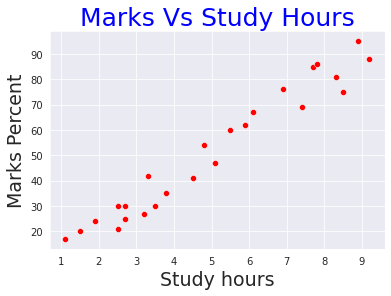

In [60]:
sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'],color="red")
plt.title('Marks Vs Study Hours',size=25,loc="center",color="blue")
plt.ylabel('Marks Percent', size=19)
plt.xlabel('Study hours', size=19)
plt.show()


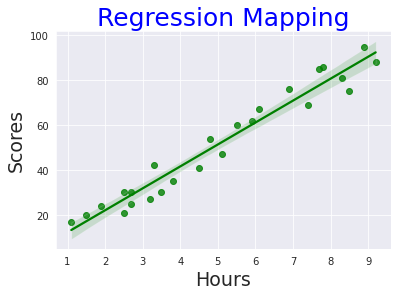

In [61]:
plt.ylabel('Marks Percentage', size=19)
plt.xlabel('Hours Studied', size=19)
plt.title('Regression Mapping',size=25,color="blue")
sns.regplot(x= df['Hours'], y= df['Scores'],color="green")
plt.show()


In [62]:
correlation=df.corr()
print("Co-Relation between the study hours and Marks")
print(correlation)

Co-Relation between the study hours and Marks
           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


# ***Train Test Split***

In [63]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
#Linear Rgression applied on training and testing data
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Regression Applied")

Regression Applied


# ***Prediction of marks***

In [64]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Number of hours studied': [i[0] for i in val_X], 'Predicted value of Marks ': [k for k in pred_y]})
print(prediction)


   Number of hours studied  Predicted value of Marks 
0                      1.5                  16.844722
1                      3.2                  33.745575
2                      7.4                  75.500624
3                      2.5                  26.786400
4                      5.9                  60.588106
5                      3.8                  39.710582
6                      1.9                  20.821393


In [65]:
list1=val_y;
list2=pred_y;
list3=val_y-pred_y;
print("Error in between the predicted value and actual value")
#difference = pd.DataFrame(['Actual Marks': val_y, 'Predicted Marks': pred_y,'Difference:'val_y-pred_y])
difference=pd.DataFrame(list(zip(list1, list2,list3)), columns =['Actual Marks','Predicted Marks','Difference:']) 
difference

Error in between the predicted value and actual value


,Actual Marks,Predicted Marks,Difference:
0,20,16.844722,3.155278
1,27,33.745575,-6.745575
2,69,75.500624,-6.500624
3,30,26.786400,3.213600
4,62,60.588106,1.411894
5,35,39.710582,-4.710582
6,24,20.821393,3.178607


In [66]:
print("Mean Error is: ")
print(mean_absolute_error(val_y,pred_y))

Mean Error is: 
4.130879918502482


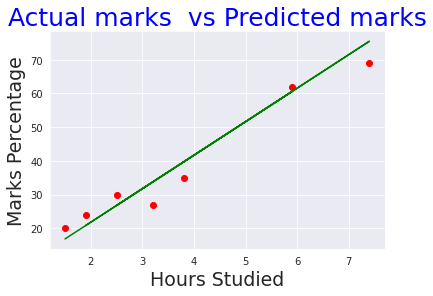

In [67]:

plt.title('Actual marks  vs Predicted marks', size=25, color="blue",loc="center")
plt.ylabel('Marks Percentage', size=19)
plt.xlabel('Hours Studied', size=19)
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='green')
plt.show()

# **Prediction of marks for the 9.25 studying hours**

In [68]:
hours = [9.25]
answer = regression.predict([hours])
print("Predicted score = {}".format(answer[0],3))

Predicted score = 93.89272889341652
